# The Quantum Picture of Optical Models

We need a theoretical framework for describing optical constants from individual quantum
excitations in a molecule. There are several non trivial steps that are needed to construct
such a model.

## Transition Dipole moments

Due to the ortho-normality of eigenvectors, the overlap between non-degenerate states in
a quantum system is allways zero. To examine transitions then between electronic states
in a molecule, we introduce the electric dipole operator $\bold{\hat{p}} = q\hat{r}$, and the
transition dipole moment defined as

$$
    \bold{d_{nm}} = -\bra{n}(q\hat{\bold{r}})\ket{m}
$$

In general this is a complex vector describing the dipole generated from the mixing of
the $\ket{n}$ and $\ket{m}$ states. Using Fermi's golden rule, we can use this dipole
between states to determine the transition rate beween the initial and final states under
a permutation $H' = H + V(\omega t)$

$$
    \Gamma_{m\to n} = \frac{2\pi}{\hbar}|\bra{n}H'\ket{m}|^2\rho(E)
$$

The dipole and quadrapole moments fall out of this equation by naturally expressing the
perterbation in frequency space. There is a whole song and dance associated with this
description, but it is not super important. What is important is the expression of the
dipole moment as the macroscopic polarizability tensor.

## Molecular Polarizability

The Molecular polarizability describes the linear response of a molecules's dipole
moment to an applied external electric field oscillating at frequency $\omega$. If
an electric field component $E_k(\omega)$ is applied allong the $k-axis$, it induces a
dipole component allong the $j$-axis given by

$$
    p_j(\omega) = \sum_k\alpha_{jk}(\omega)E_k(\omega)
$$

Where $\alpha_{jk}$ is a complex tensor describing the response of the molecule. Using
time dependent perturbation theory and linier response theory, we can determine this
response using the transition dipole moments between transitions.

$$
    \alpha_{jk}(\omega) = \frac{1}{\hbar} \sum_m \left( \frac{ (d_{gm})_j (d_{mg})_k }{ \omega_{mg} - \omega - i\Gamma_{mg}/2 } + \frac{ (d_{mg})_j (d_{gm})_k }{ \omega_{mg} + \omega + i\Gamma_{mg}/2 } \right)
$$

This equation is the Kramers-Heisenberg dispersion formula.


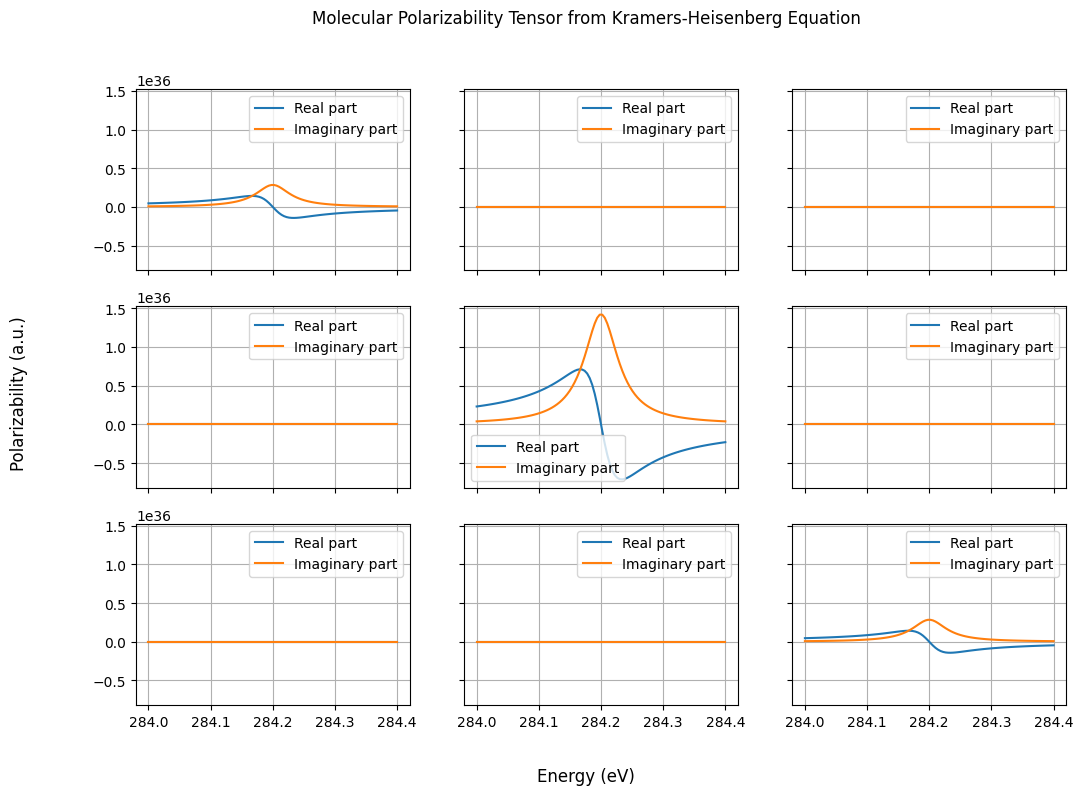

In [49]:
# Example of using the Kramers-Heisenberg equation to calculate the Molecular
# Polarizability Tensor for a simple harmonic oscillator with a single frequency.
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, c, epsilon_0


def omega(energy):
    """Angular frequency from energy."""
    return energy


# make up a fake dipole moment
dipole = np.diag([1.0, 5.0, 1.0])  # Diagonal matrix for simplicity
lifetime = 15  # lifetime of the excited state in seconds
energy = 284.2  # energy in eV of the ionization energy of Carbon 1s
frequency = omega(energy)  # angular frequency in rad/s
polarizability = np.zeros((3, 3), dtype=np.complex128)


# Kramers-Heisenberg equation for the polarizability tensor as a function of energy
def polarizability_tensor(
    transition_frequency, incident_light_frequency, dipole, lifetime
):
    """Calculate the polarizability tensor using the Kramers-Heisenberg equation.

    Parameters
    ----------
    transition_frequency : float
        Transition energy (E_mg) associated with the natural frequency
        omega_mg. The globally defined omega() function will be called with this value
        to determine omega_mg.
    frequency : float
        Angular frequency of the incident light (omega_incident) in rad/s.
    dipole : np.ndarray
        The dipole transition strength tensor D_jk = (d_gm)_j (d_mg)_k
        for the specific transition m. It is assumed that the second term's
        numerator (d_mg)_j (d_gm)_k is equal to D_jk (e.g. for real d_gm).
    lifetime : float
        Lifetime of the excited state (tau_mg) in seconds.
        The damping constant Gamma_mg = 1 / lifetime.

    Returns
    -------
    np.ndarray
        The complex polarizability tensor alpha_jk(omega_incident).
    """
    # Calculate omega_mg (angular frequency of the transition E_mg)
    # This uses the omega() function defined in the script's scope.
    # Linewidth term Gamma_mg / 2, where Gamma_mg = 1/lifetime
    gamma_mg_div_2 = (1 / lifetime) / 2.0

    # First term in the Kramers-Heisenberg formula:
    # Numerator: (d_gm)_j (d_mg)_k, which is the input 'dipole' matrix.
    # Denominator: (omega_mg - omega_incident - i * Gamma_mg/2)
    # omega_incident is the input 'frequency'.
    term1_denominator = (
        transition_frequency - incident_light_frequency - (1j * gamma_mg_div_2)
    )
    term1 = dipole / term1_denominator  # Element-wise division

    # Second term in the Kramers-Heisenberg formula:
    # Numerator: (d_mg)_j (d_gm)_k. Assumed equal to the input 'dipole' matrix.
    # Denominator: (omega_mg + omega_incident + i * Gamma_mg/2)
    term2_denominator = (
        transition_frequency + incident_light_frequency + (1j * gamma_mg_div_2)
    )
    term2 = dipole / term2_denominator  # Element-wise division

    # Sum the terms and multiply by 1/hbar.
    # hbar should be in scope (imported from scipy.constants).
    alpha_tensor = (1 / hbar) * (term1 + term2)

    return alpha_tensor


# calculate and plot the polarizability tensor as a function of energy

energy_range = np.linspace(284, 284.4, 100)  # energy range in eV
frequency_range = omega(energy_range)  # convert to angular frequency
polarizability = np.array(
    [
        polarizability_tensor(frequency, freq, dipole, lifetime)
        for freq in frequency_range
    ]
)

fig, ax = plt.subplots(3, 3, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle("Molecular Polarizability Tensor from Kramers-Heisenberg Equation")
fig.supxlabel("Energy (eV)")
fig.supylabel("Polarizability (a.u.)")
for i in range(3):
    for j in range(3):
        ax[i, j].plot(energy_range, polarizability[:, i, j].real, label="Real part")
        ax[i, j].plot(
            energy_range, polarizability[:, i, j].imag, label="Imaginary part"
        )
        ax[i, j].legend()
        ax[i, j].grid()

## Scattering Factors

Though allot of work, the molecular polarizability tensor can be coerced into the
form of a scattering form factor. Directly this is done though the intermediate step
of considering the photoabsorption cross section tensor, but we will skip that for
now. The scattering form factow can be written out as

$$
    f_{2,jk} = \frac{\omega^2}{4\pi\epsilon_0r_ec^2}Im(\alpha_{jk}(\omega))
$$

## Index of refraction

The Index of refraction tensors can thus be expressed though the scattering factor as

$$
    \beta_{jk}(\omega) = \frac{N_v}{2\epsilon_0}Im(\alpha_{jk}(\omega))
$$
